In [117]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor as gbm #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from numpy import mean, absolute
import csv
import os


In [11]:
#import matplotlib.pylab as plt
#%matplotlib inline
#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 12, 4

In [60]:

## the initial train_dta was split into train and validation sets.
## the model was optimized in R using grid search. The parameters are obtained from the grid search.

train = pd.read_csv('C:/percolata/train_data.csv',sep=',')
train.dtypes
train['device_angle'] = train['device_angle'].astype('category')
train['distance_to_door'] = train['distance_to_door'].astype('category')
train['AM_or_PM'] = train['AM_or_PM'].astype('category')
train['mall_or_street'] = train['mall_or_street'].astype('category')

cols_to_transform = [ 'device_angle', 'distance_to_door', 'AM_or_PM', 'mall_or_street' ]
df_with_dummies = pd.get_dummies( train,columns = cols_to_transform )


In [78]:
type(train.device_angle)
#train.dtypes

pandas.core.series.Series

In [71]:
## converting the factors to dummy variables. This pre processing is necessary for gradient boosted trees
Y = df_with_dummies['groundtruth_walkin']
X = df_with_dummies.drop('groundtruth_walkin', axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, Y, test_size=0.25, random_state=42)


In [80]:
params = {'n_estimators': 5000, 'max_depth': 9, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'lad','min_samples_leaf':9}

In [82]:
## fitting gradient boosted tree
clf = gbm(**params)

In [83]:
## fitting tree to the data set.
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='lad', max_depth=9,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=9,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [92]:
lad = mean_absolute_error(y_test, clf.predict(X_test))
print("LAD: %.4f" % lad)
lad1 = mean(absolute(clf.predict(X_test)-y_test))
lad1


LAD: 2.9622


2.9621898027224214

In [143]:
model = clf.fit(X,Y)

In [94]:
test =  pd.read_csv('C:/percolata/test_data.csv',sep=',')

In [96]:
test['device_angle'] = test['device_angle'].astype('category')
test['distance_to_door'] = test['distance_to_door'].astype('category')
test['AM_or_PM'] = test['AM_or_PM'].astype('category')
test['mall_or_street'] = test['mall_or_street'].astype('category')

In [98]:
cols_to_transform = [ 'device_angle', 'distance_to_door', 'AM_or_PM', 'mall_or_street' ]
df_with_dummies1 = pd.get_dummies( test,columns = cols_to_transform )

In [104]:
test['groundtruth_walkin'] = np.ceil(clf.predict(df_with_dummies1))

In [112]:
test.groundtruth_walkin[test.groundtruth_walkin < 0 ] = 0

C:\Users\jayabharath\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
#test.groundtruth_walkin

In [113]:
test.dtypes

device_angle                  category
distance_to_door              category
AM_or_PM                      category
mall_or_street                category
average_person_size            float64
video_walkin                     int64
video_walkout                    int64
predict_walkin                   int64
predict_walkout                  int64
wifi_walkin                      int64
wifi_walkout                     int64
sales_in_next_15_min             int64
sales_in_next_15_to_30_min       int64
groundtruth_walkin             float64
dtype: object

In [139]:
type(test)

pandas.core.frame.DataFrame

In [140]:
## writing CSV file to directory
test.to_csv('test01.csv',sep=',')

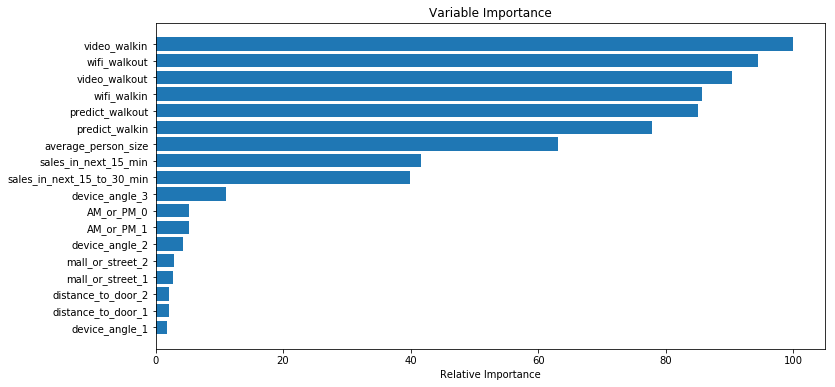

In [144]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
#plt.show()

In [142]:
test.head(10)

,device_angle,distance_to_door,AM_or_PM,mall_or_street,average_person_size,video_walkin,video_walkout,predict_walkin,predict_walkout,wifi_walkin,wifi_walkout,sales_in_next_15_min,sales_in_next_15_to_30_min,groundtruth_walkin
0,3,1,0,1,1327.50,13,11,0,0,9,5,2,2,14.0
1,2,2,0,1,1073.25,4,7,32,33,0,3,1,3,2.0
2,3,1,1,1,1327.50,49,48,45,39,15,19,6,3,58.0
3,3,1,1,1,2299.50,17,22,21,21,7,5,1,0,21.0
4,2,2,1,1,4114.00,2,4,3,1,1,0,0,0,3.0
5,2,2,1,1,3571.50,1,2,0,1,2,6,0,1,1.0
6,3,1,1,1,1327.50,14,14,0,0,7,5,2,4,16.0
7,3,2,1,2,1811.00,1,0,7,4,1,2,0,0,1.0
8,1,1,0,2,1852.00,1,1,1,0,3,3,1,2,3.0
9,3,1,1,1,1327.50,2,3,0,0,1,2,0,0,2.0
